# Libre

In [55]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from math import ceil
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [56]:
def load(filename: str):
    return pd.read_csv(filename)

In [69]:
data = load('../data/I3_25_nomot.csv')

In [81]:
def points_to_uncertainties(data: pd.Series, resolution: int = 10) -> np.ndarray:
    new_len: int = ceil(len(data) / resolution)
    avg: np.ndarray = np.zeros(new_len)
    std: np.ndarray = np.zeros(new_len)
    for i in range(new_len):
        subarr = data[resolution*i:resolution*(i+1)]
        avg[i] = np.mean(subarr)
        std[i] = np.max(subarr) - avg[i]
    return unp.uarray(avg, std)

In [82]:
def dataset_to_uncertainties(dataset: pd.DataFrame, resolution: int = 10) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    t = dataset["Temps"].iloc[::resolution]
    x = points_to_uncertainties(dataset["X"], resolution)
    y = points_to_uncertainties(dataset["Y"], resolution)
    return t, x, y

In [83]:
def center(dataset: pd.DataFrame, from_time: float = 0.0) -> pd.DataFrame:
    idx = np.where(dataset["Temps"] < from_time)[0]
    df = dataset.drop(idx)
    df["Temps"] -= df["Temps"].iat[0]
    df["X"] -= np.mean(df["X"])
    df["Y"] -= np.mean(df["Y"])
    return df

# Do the calcs

(422,) (422,) (422,)


<ErrorbarContainer object of 3 artists>

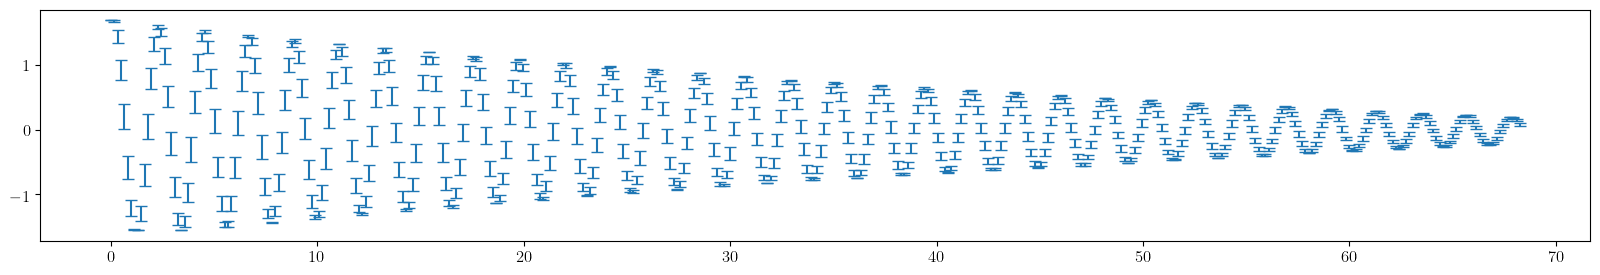

In [84]:
# some math here
t, x, y = dataset_to_uncertainties(center(data, 0), 2)
print(t.shape, x.shape, y.shape)

plt.figure(figsize=(20, 3))
plt.errorbar(nom_vals(t), nom_vals(x), yerr=std_devs(x), ls='none')